In [1]:
!ls ../../data/

tanzania_features.csv
tanzania_target.csv


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import pandas as pd
import os 
from datetime import date 
from time import strftime 

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Seeing the data 

In [3]:
features = pd.read_csv('../../data/tanzania_features.csv')

#features.columns = [col.strip() for col in features.columns]
features

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
target=pd.read_csv('../../data/tanzania_target.csv')
target

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [6]:
features.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [7]:
for column in features.columns:
    print(f"Values in {column} ", features[column].unique()) 
    print(features[column].value_counts(normalize=True))

Values in id  [69572  8776 34310 ... 37057 31282 26348]
0        0.000017
19811    0.000017
38200    0.000017
34106    0.000017
36155    0.000017
           ...   
64138    0.000017
62091    0.000017
51852    0.000017
49805    0.000017
2047     0.000017
Name: id, Length: 59400, dtype: float64
Values in amount_tsh  [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03

In [8]:
new_df = features.merge(target, on='id')

In [9]:
#take out - funder -- num_private 
new_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [10]:
#for column in new_df.columns:
    #print(f"Values in {column} ", new_df[column].unique()) 
    #print(new_df[column].value_counts(normalize=True))

In [11]:
new_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [12]:
new_df.num_private.value_counts()

0      58643
6         81
1         73
8         46
5         46
       ...  
42         1
136        1
35         1
131        1
94         1
Name: num_private, Length: 65, dtype: int64

In [13]:
new_df.funder.value_counts()

Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Dgv                                1
Mungaya                            1
Rotary Club Of Usa And Moshi       1
Msikitini                          1
Nyabibuye Islamic Center           1
Name: funder, Length: 1897, dtype: int64

In [14]:
new_df.installer.value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
Piscop                      1
maendeleo ya jamii          1
Kamata project              1
Mama Hamisa                 1
Zaburi and neighbors        1
Name: installer, Length: 2145, dtype: int64

In [15]:
new_df.longitude.value_counts()

0.000000     1812
32.977191       2
32.919861       2
37.542785       2
39.105307       2
             ... 
37.141893       1
35.839879       1
33.638301       1
35.347266       1
35.164770       1
Name: longitude, Length: 57516, dtype: int64

In [16]:
new_df.latitude.value_counts()

-2.000000e-08    1812
-2.494546e+00       2
-6.983183e+00       2
-7.056923e+00       2
-7.056372e+00       2
                 ... 
-6.162973e+00       1
-1.595138e+00       1
-2.007878e+00       1
-6.787691e+00       1
-1.077290e+01       1
Name: latitude, Length: 57517, dtype: int64

In [17]:
#new_df.management.value_counts()

In [18]:
new_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [19]:
new_df.scheme_name.value_counts()

K                               682
None                            644
Borehole                        546
Chalinze wate                   405
M                               400
                               ... 
Nambehe water Gravity scheme      1
Keza water supply                 1
Mshi                              1
AIC kahunda                       1
Mradi wa maji wa ng`ambo          1
Name: scheme_name, Length: 2696, dtype: int64

In [20]:
new_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

## Cleaning 

In [21]:
new_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [22]:
clean_df=new_df.drop(columns=['id', 'waterpoint_type', 'scheme_name', 'funder',
        'num_private', 'permit', 'extraction_type', 'extraction_type_group',
        'region_code','lga','ward', 'recorded_by', 'public_meeting',
        'scheme_management', 'payment','water_quality', 'source_class','subvillage','quantity_group'
                             ,'management', 'source_type'])

In [23]:
clean_df.nunique()

amount_tsh                  98
date_recorded              356
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
basin                        9
region                      21
district_code               20
population                1049
construction_year           55
extraction_type_class        7
management_group             5
payment_type                 7
quality_group                6
quantity                     5
source                      10
waterpoint_type_group        6
status_group                 3
dtype: int64

In [24]:
clean_df = clean_df[clean_df['construction_year']!=0]

In [25]:
clean_df = clean_df[clean_df['longitude']!=0]

In [26]:
clean_df = clean_df[clean_df['latitude']!=-2.000000e-08]

In [27]:
clean_df

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,region,district_code,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source,waterpoint_type_group,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,5,109,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,2,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,4,250,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,63,58,1986,submersible,user-group,never pay,good,dry,machine dbh,communal standpipe,non functional
5,20.0,2011-03-13,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Tanga,8,1,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,0.0,2013-08-03,540,Government,38.044070,-4.272218,Kwa,Pangani,Kilimanjaro,3,210,1967,gravity,user-group,never pay,good,enough,river,communal standpipe,non functional
59394,500.0,2011-03-09,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Morogoro,6,89,2007,submersible,user-group,monthly,good,enough,machine dbh,communal standpipe,non functional
59395,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,5,125,1999,gravity,user-group,per bucket,good,enough,spring,communal standpipe,functional
59396,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,4,56,1996,gravity,user-group,annually,good,enough,river,communal standpipe,functional


## Feature Importance 

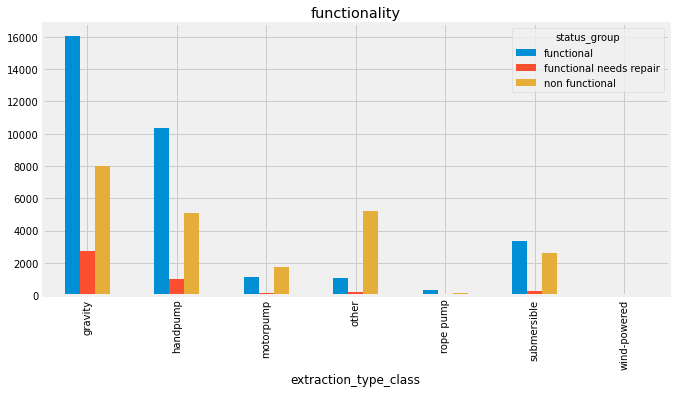

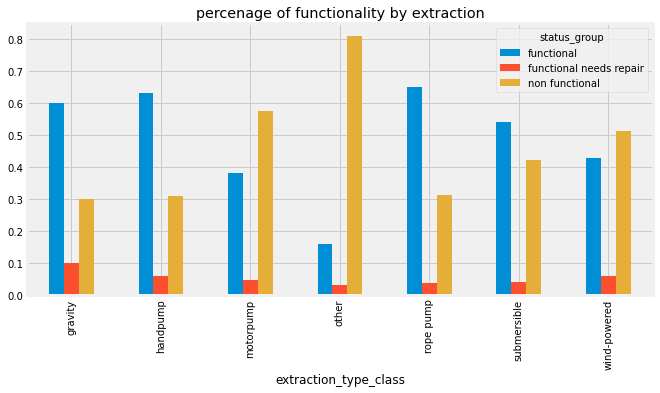

In [28]:
mplines = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()


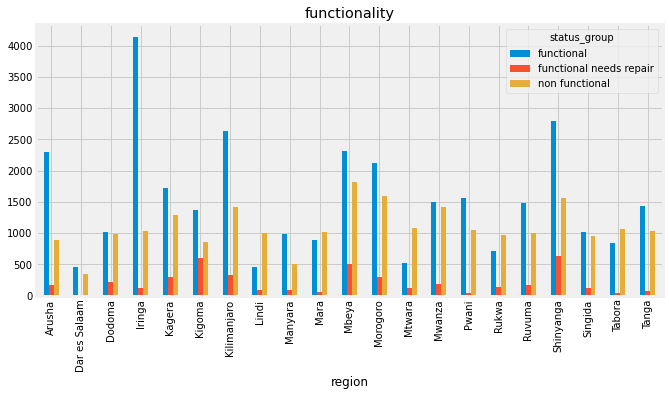

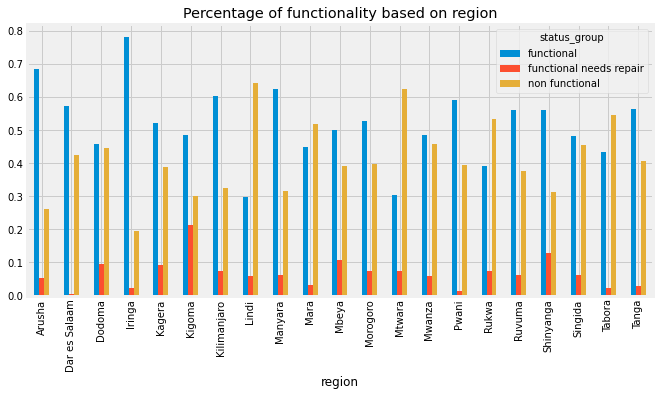

In [29]:
#functionality in region 
mplines = new_df.groupby('region')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('region')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on region")
plt.show()

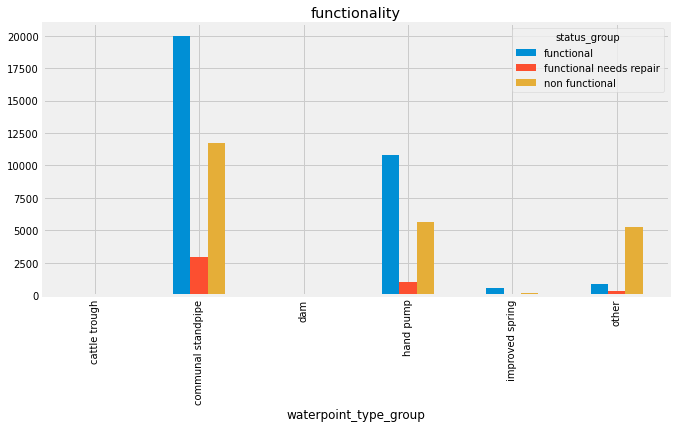

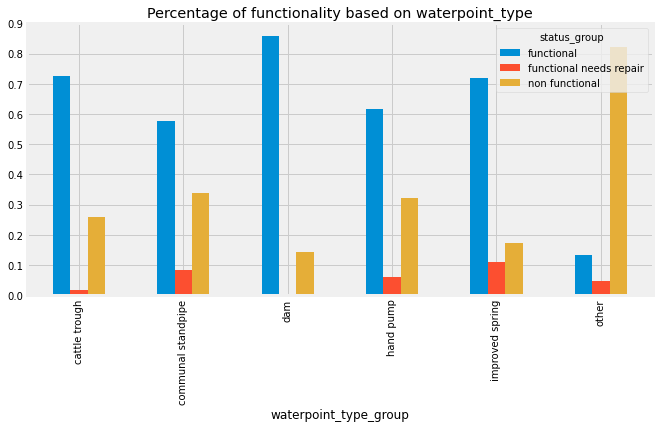

In [30]:
#waterpoint_type_group functionality 
mplines = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on waterpoint_type")
plt.show()

In [31]:
#combining non-functional and needs repair 
clean_df['status_group'] = clean_df["status_group"].replace("functional needs repair", "non functional")

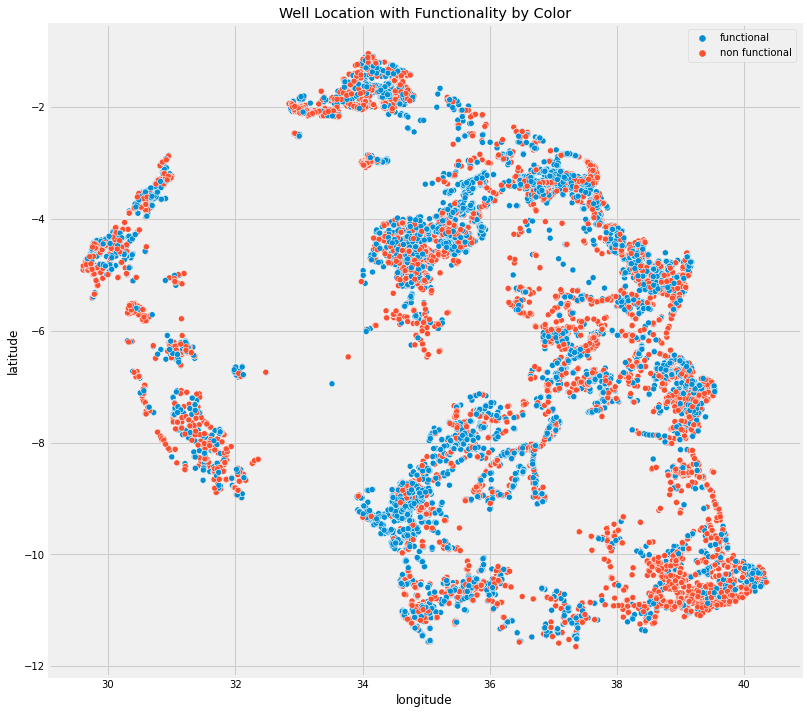

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=clean_df, ax=ax)
plt.title('Well Location with Functionality by Color')
plt.legend(fancybox=True);

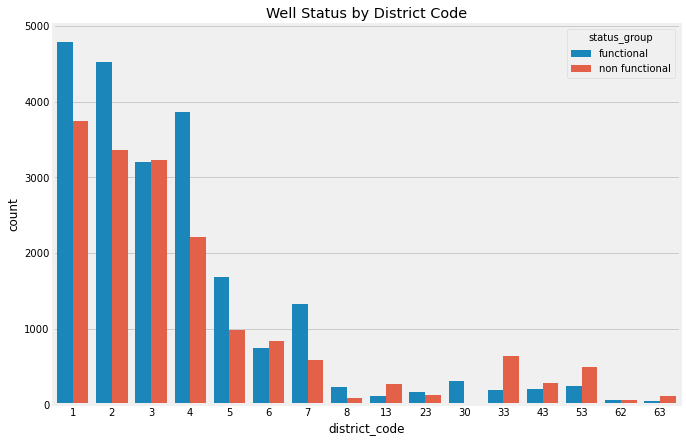

In [33]:
plt.figure(figsize=(10, 7))

sns.countplot(data=clean_df,x='district_code',hue='status_group')
plt.title('Well Status by District Code');

In [34]:
new_df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [35]:
new_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [36]:
new_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

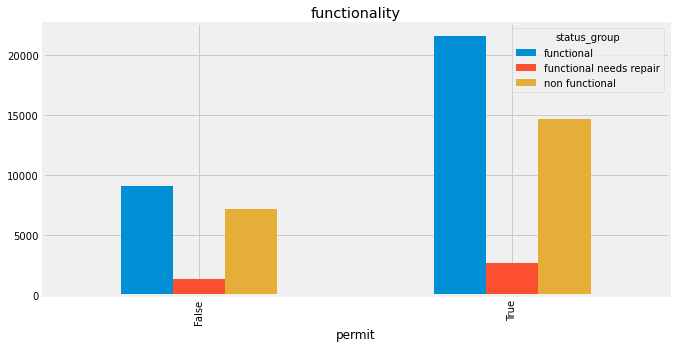

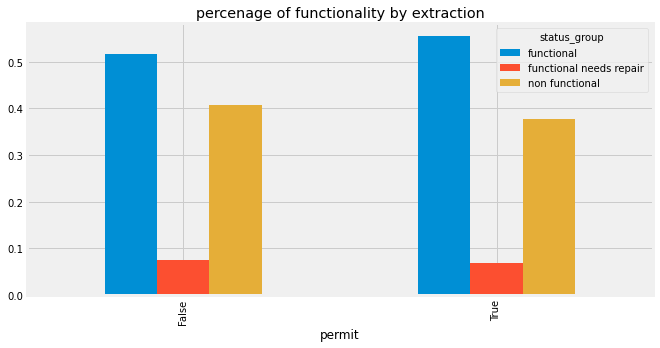

In [37]:
# permit vs non-permit 
mplines = new_df.groupby('permit')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('permit')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()

In [38]:
clean_df

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,region,district_code,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source,waterpoint_type_group,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,5,109,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,2,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,4,250,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,63,58,1986,submersible,user-group,never pay,good,dry,machine dbh,communal standpipe,non functional
5,20.0,2011-03-13,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Tanga,8,1,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,0.0,2013-08-03,540,Government,38.044070,-4.272218,Kwa,Pangani,Kilimanjaro,3,210,1967,gravity,user-group,never pay,good,enough,river,communal standpipe,non functional
59394,500.0,2011-03-09,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Morogoro,6,89,2007,submersible,user-group,monthly,good,enough,machine dbh,communal standpipe,non functional
59395,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,5,125,1999,gravity,user-group,per bucket,good,enough,spring,communal standpipe,functional
59396,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,4,56,1996,gravity,user-group,annually,good,enough,river,communal standpipe,functional


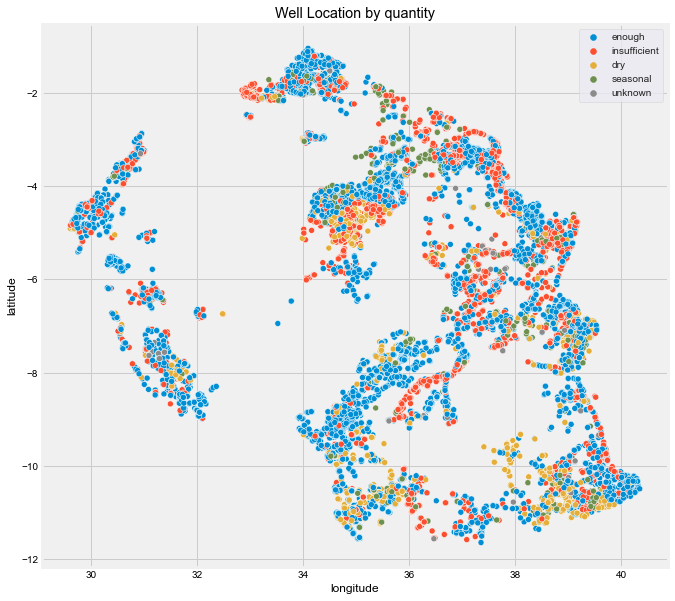

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="quantity", data=clean_df, ax=ax)
plt.title('Well Location by quantity')

plt.legend(fancybox=True);

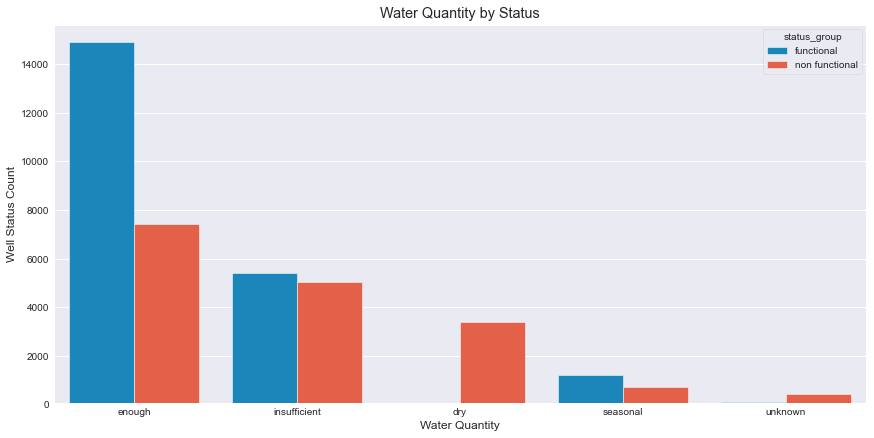

In [40]:
plt.figure(figsize=(13, 7))

sns.countplot(data=clean_df,x='quantity',hue='status_group')
plt.title('Water Quantity by Status')
plt.xlabel('Water Quantity')
plt.ylabel('Well Status Count');

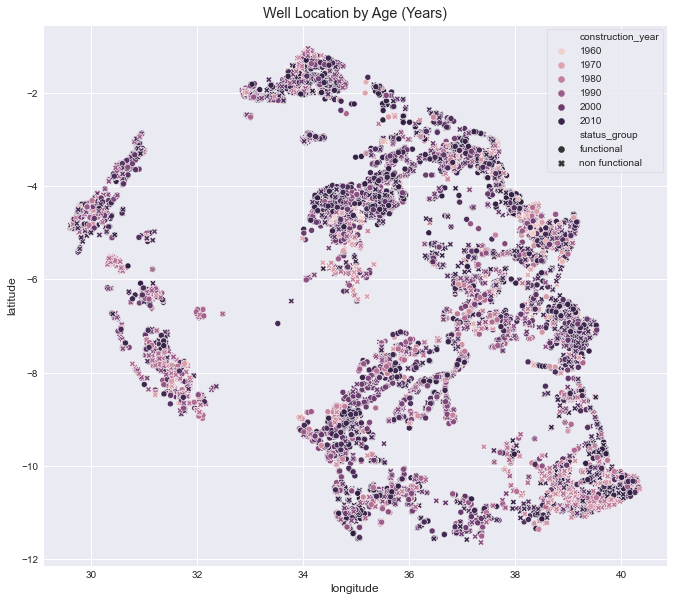

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="construction_year", style='status_group', data=clean_df, ax=ax)
plt.title('Well Location by Age (Years)')

plt.legend(fancybox=True);


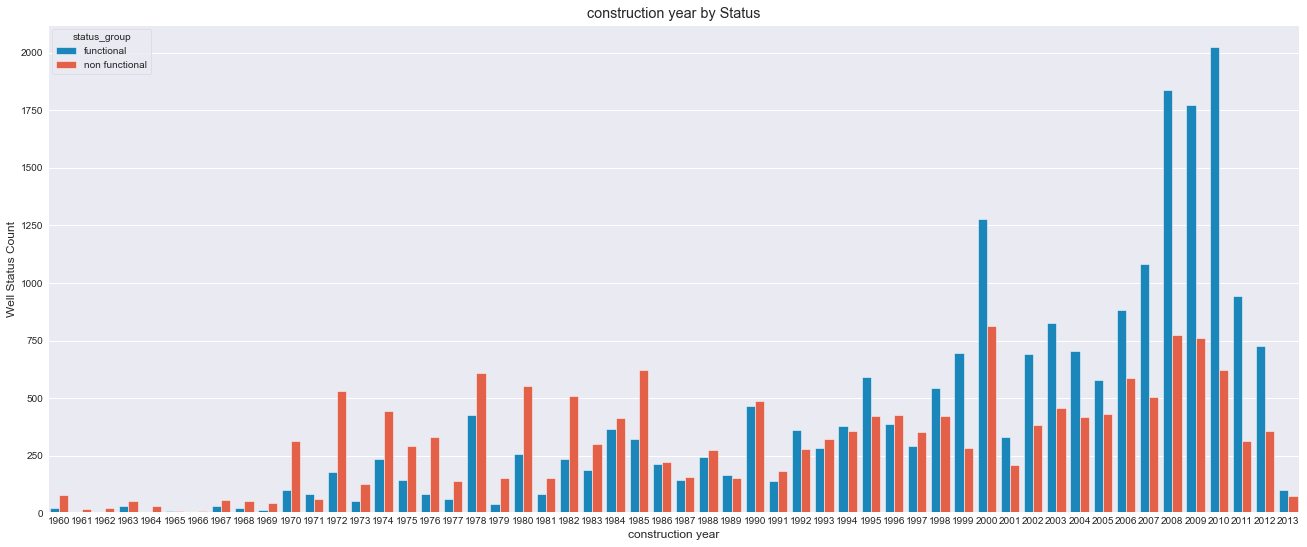

In [42]:
#from 1997 back (1960) there is only one year where there were more functional wells built than not 
plt.figure(figsize=(20, 9))

sns.countplot(data=clean_df,x='construction_year',hue='status_group')
plt.title('construction year by Status')
plt.xlabel('construction year')
plt.ylabel('Well Status Count');

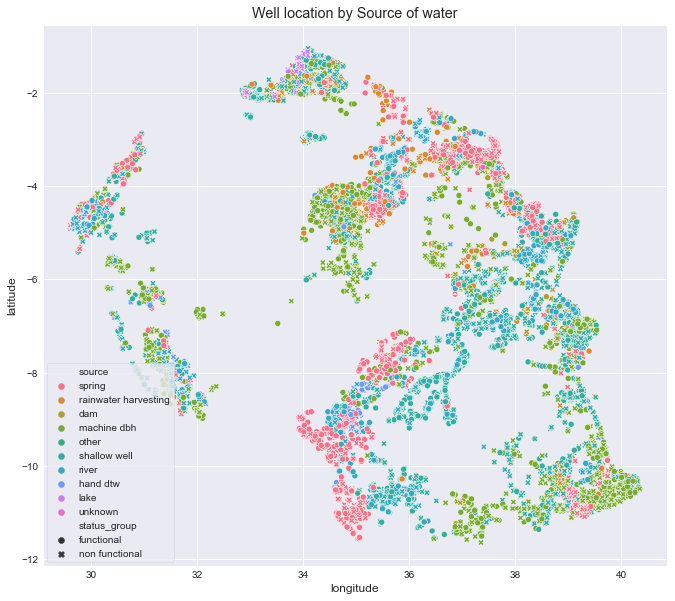

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="source", style='status_group', data=clean_df, ax=ax)
plt.title('Well location by Source of water')

plt.legend(fancybox=True);

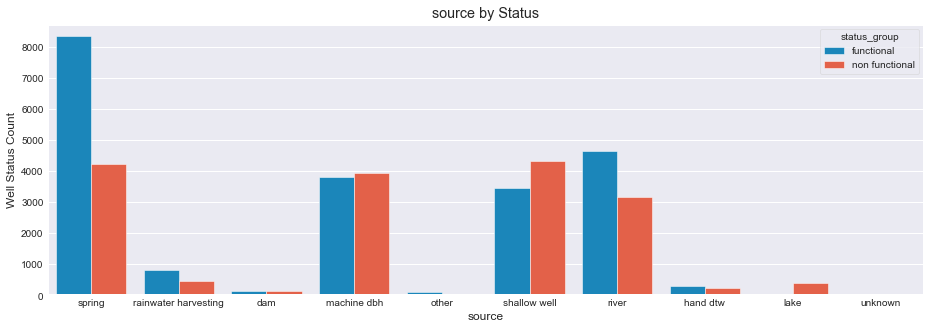

In [137]:
#machine dbh/shallow well/lake all have more non-functioning wells than functioning
#spring water and lakes provide the majority of functioning wells 
plt.figure(figsize=(14,5))

sns.countplot(data=clean_df,x='source',hue='status_group')
plt.title('source by Status')
plt.xlabel('source')
plt.ylabel('Well Status Count');

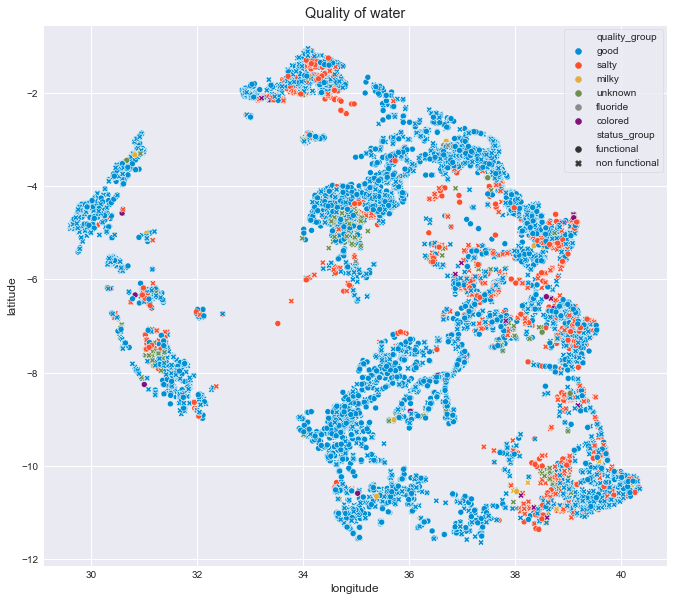

In [45]:

fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="quality_group", style='status_group', data=clean_df, ax=ax)
plt.title('Quality of water')

plt.legend(fancybox=True);

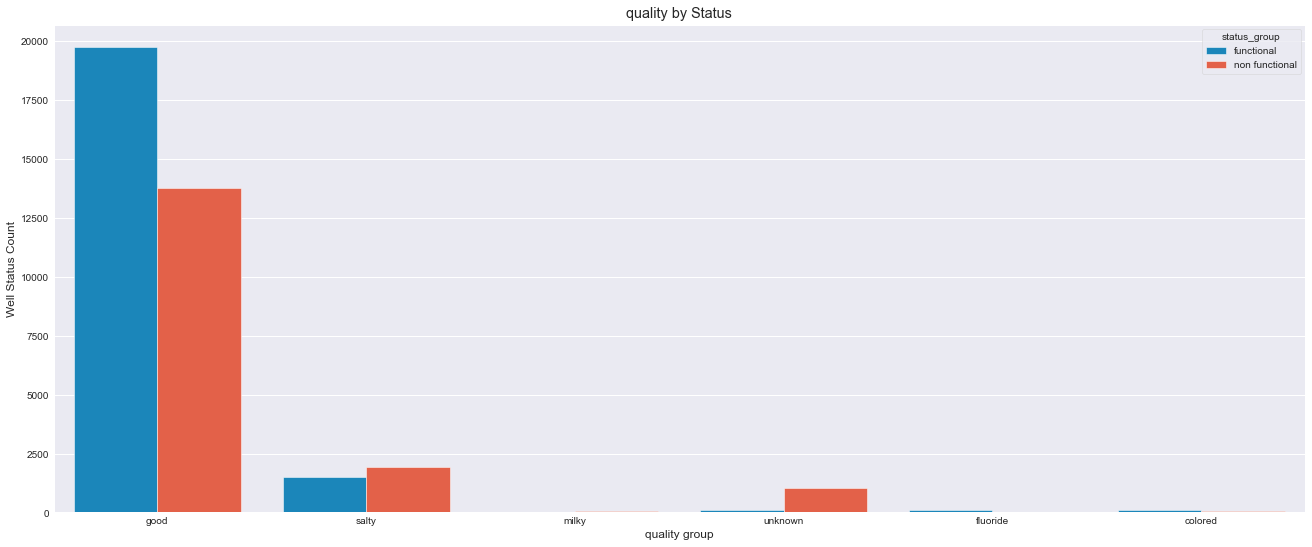

In [46]:
#both salty and unkown often produce non-functioning wells 
#good still has a fair amount of non-functioning wells. But when compared to its amount of functioning ones 
#,we can assume it produces better outcomes for a wells overall status. 
#roughly 32,000 'good' quality wells.
plt.figure(figsize=(20, 9))

sns.countplot(data=clean_df,x='quality_group',hue='status_group')
plt.title('quality by Status')
plt.xlabel('quality group')
plt.ylabel('Well Status Count');

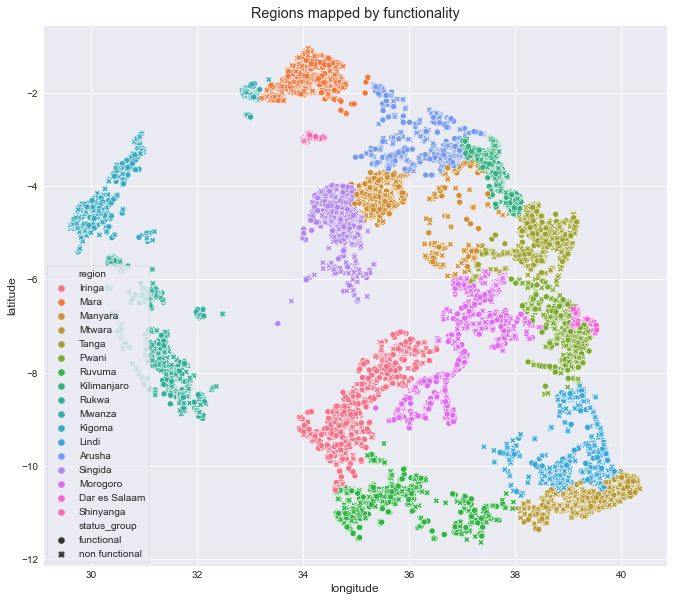

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="region", style='status_group', data=clean_df, ax=ax)
plt.title('Regions mapped by functionality')

plt.legend(fancybox=True);

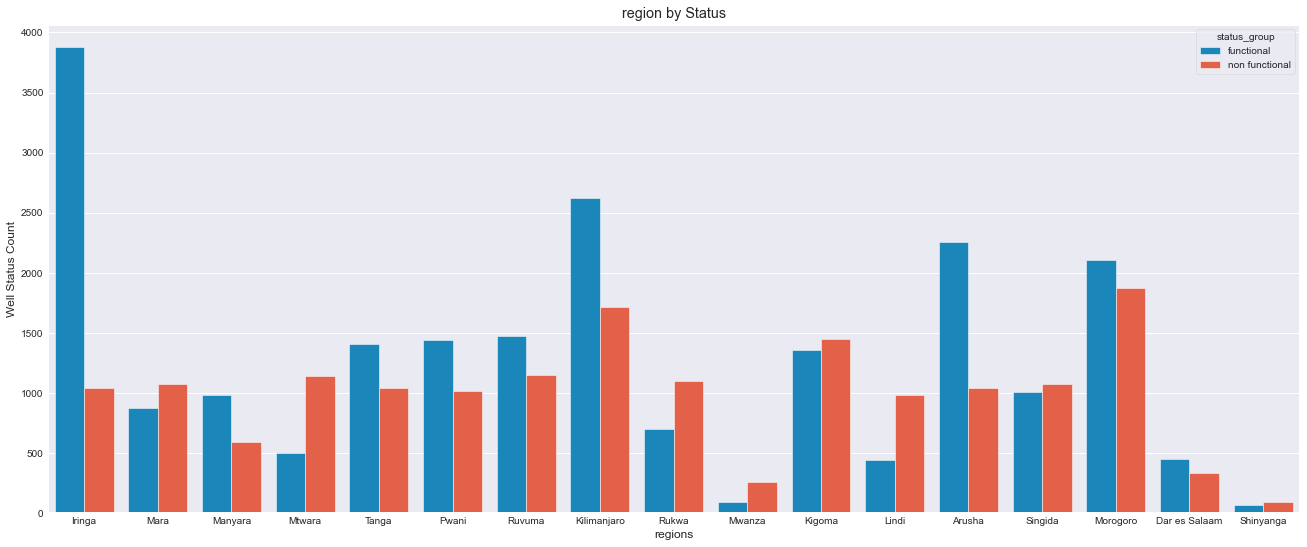

In [48]:
plt.figure(figsize=(20, 9))

sns.countplot(data=clean_df,x='region',hue='status_group')
plt.title('region by Status')
plt.xlabel('regions')
plt.ylabel('Well Status Count');

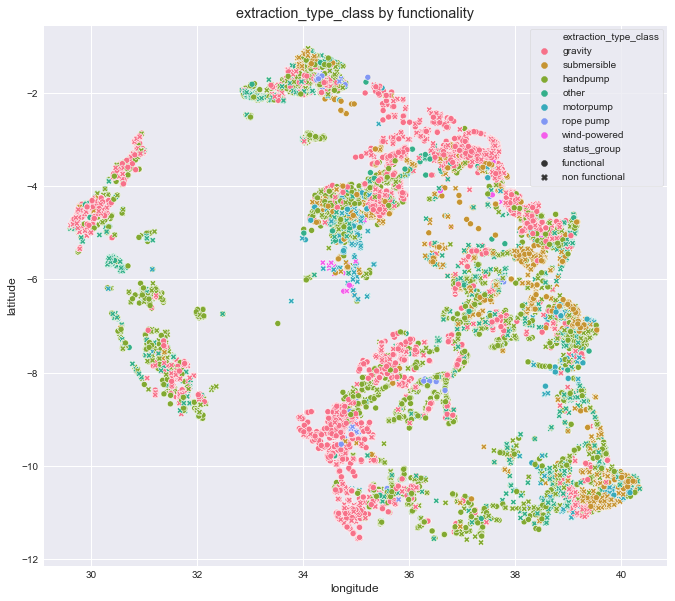

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="extraction_type_class", style='status_group', data=clean_df, ax=ax)
plt.title('extraction_type_class by functionality')

plt.legend(fancybox=True);

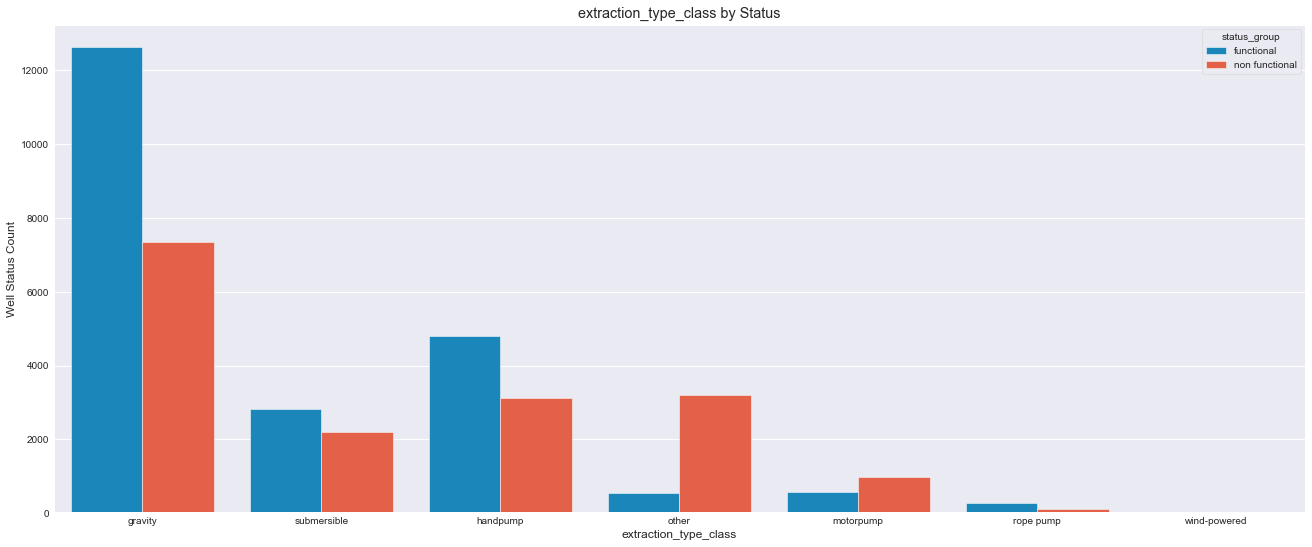

In [50]:
#other and handpump techniques produce non-functioning wells 
plt.figure(figsize=(20, 9))

sns.countplot(data=clean_df,x='extraction_type_class',hue='status_group')
plt.title('extraction_type_class by Status')
plt.xlabel('extraction_type_class')
plt.ylabel('Well Status Count');

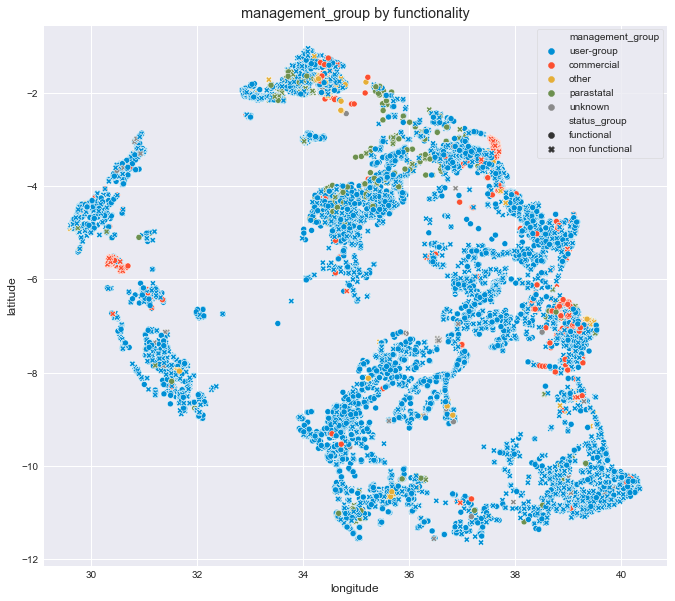

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="management_group", style='status_group', data=clean_df, ax=ax)
plt.title('management_group by functionality')

plt.legend(fancybox=True);

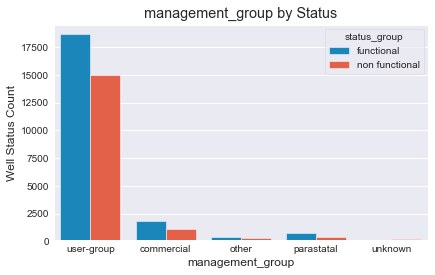

In [52]:
sns.countplot(data=clean_df,x='management_group',hue='status_group')
plt.title('management_group by Status')
plt.xlabel('management_group')
plt.ylabel('Well Status Count');

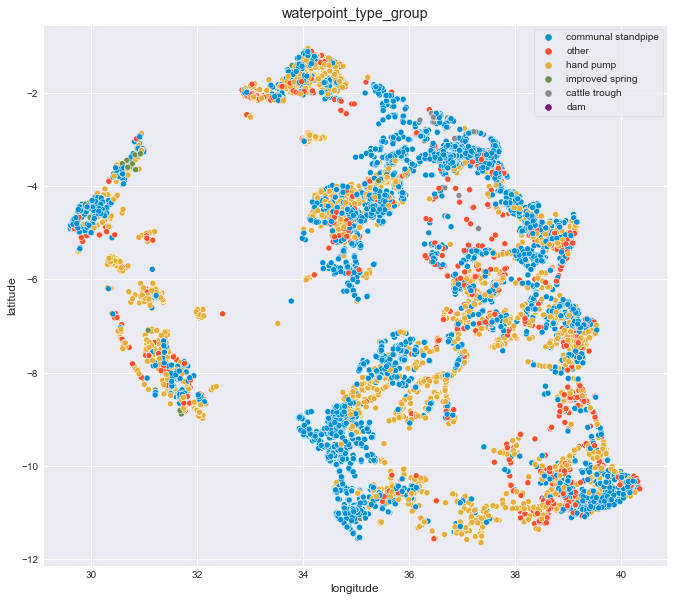

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="waterpoint_type_group", data=clean_df, ax=ax)
plt.title('waterpoint_type_group')

plt.legend(fancybox=True);

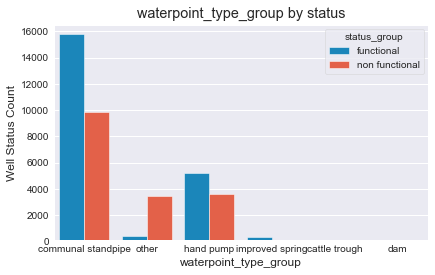

In [54]:
sns.countplot(data=clean_df,x='waterpoint_type_group',hue='status_group')
plt.title('waterpoint_type_group by status')
plt.xlabel('waterpoint_type_group')
plt.ylabel('Well Status Count');

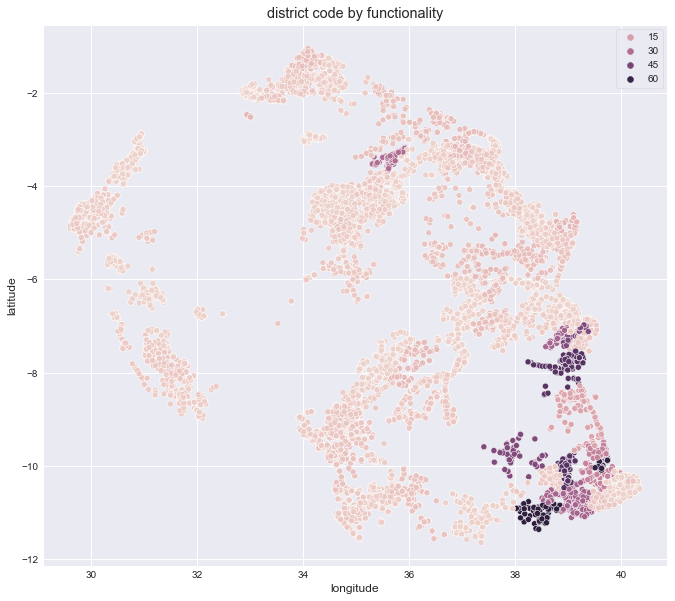

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue='district_code', data=clean_df, ax=ax)
plt.title('district code by functionality')

plt.legend(fancybox=True);

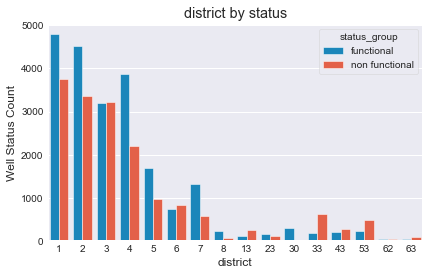

In [56]:
sns.countplot(data=clean_df,x='district_code',hue='status_group')
plt.title('district by status')
plt.xlabel('district')
plt.ylabel('Well Status Count');

## Further analysis -- model prep

In [57]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             38691 non-null  float64
 1   date_recorded          38691 non-null  object 
 2   gps_height             38691 non-null  int64  
 3   installer              37345 non-null  object 
 4   longitude              38691 non-null  float64
 5   latitude               38691 non-null  float64
 6   wpt_name               38691 non-null  object 
 7   basin                  38691 non-null  object 
 8   region                 38691 non-null  object 
 9   district_code          38691 non-null  int64  
 10  population             38691 non-null  int64  
 11  construction_year      38691 non-null  int64  
 12  extraction_type_class  38691 non-null  object 
 13  management_group       38691 non-null  object 
 14  payment_type           38691 non-null  object 
 15  qu

In [58]:
cat_df=clean_df[['status_group','region','extraction_type_class',
                 'construction_year','source','quantity','longitude','latitude']]

In [59]:
model_df = pd.get_dummies(cat_df)
model_df

,construction_year,longitude,latitude,status_group_functional,status_group_non functional,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,1999,34.938093,-9.856322,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2010,34.698766,-2.147466,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2009,37.460664,-3.821329,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1986,38.486161,-11.155298,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2009,39.172796,-4.765587,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,1967,38.044070,-4.272218,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
59394,2007,37.634053,-6.124830,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59395,1999,37.169807,-3.253847,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
59396,1996,35.249991,-9.070629,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [60]:
model_df.columns

Index(['construction_year', 'longitude', 'latitude', 'status_group_functional',
       'status_group_non functional', 'region_Arusha', 'region_Dar es Salaam',
       'region_Iringa', 'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi',
       'region_Manyara', 'region_Mara', 'region_Morogoro', 'region_Mtwara',
       'region_Mwanza', 'region_Pwani', 'region_Rukwa', 'region_Ruvuma',
       'region_Shinyanga', 'region_Singida', 'region_Tanga',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'source_dam', 'source_hand dtw',
       'source_lake', 'source_machine dbh', 'source_other',
       'source_rainwater harvesting', 'source_river', 'source_shallow well',
       'source_spring', 'source_unknown', 'quantity_dry', 'quantity_enough',
       'quantity_insufficient', 'q

In [61]:
model_df

,construction_year,longitude,latitude,status_group_functional,status_group_non functional,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,1999,34.938093,-9.856322,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2010,34.698766,-2.147466,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2009,37.460664,-3.821329,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1986,38.486161,-11.155298,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2009,39.172796,-4.765587,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,1967,38.044070,-4.272218,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
59394,2007,37.634053,-6.124830,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59395,1999,37.169807,-3.253847,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
59396,1996,35.249991,-9.070629,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [62]:
y= model_df['status_group_non functional']
X= model_df.drop(columns=['status_group_non functional', 'status_group_functional'])

In [63]:
y.value_counts(normalize=True)

0    0.560957
1    0.439043
Name: status_group_non functional, dtype: float64

## Train test split 

In [64]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2022, stratify=y)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2022, stratify=y_tr)

In [66]:
X_train.head()

,construction_year,longitude,latitude,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
24471,1972,38.351516,-4.890829,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1942,1984,30.480717,-5.611879,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15869,2004,35.435674,-8.102678,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
32586,1972,36.842935,-6.201666,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
25029,1998,37.789280,-6.954162,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Modeling logreg1

In [67]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [68]:
from sklearn.inspection import permutation_importance
logreg = LogisticRegression()

In [69]:
logreg = modeling_function(logreg, X_train, y_train, X_val, y_val)

Training accuracy:  0.7058991879225843
Validation accuracy:  0.7117957032833401


In [70]:
perm_log=permutation_importance(logreg,X_test,y_test, n_repeats=10, random_state=2022)
perm_log

{'importances_mean': array([-1.37835975e-04,  1.32667126e-03,  1.22329428e-03,  4.39352171e-03,
         8.61474845e-05,  4.99655410e-04,  3.01516196e-03,  3.44589938e-05,
         8.09786354e-04,  7.58097864e-04,  5.84079945e-03,  8.61474845e-05,
         1.17160579e-03,  1.72294969e-04,  1.72294969e-05,  9.30392833e-04,
         1.91247416e-03, -3.44589938e-05,  2.72226051e-03,  1.55065472e-04,
         7.40868367e-04,  2.91178498e-02,  2.49827705e-03,  1.86940041e-02,
         9.82081323e-04,  4.56581668e-03,  0.00000000e+00,  0.00000000e+00,
         1.72294969e-05,  6.78842178e-03,  1.67126120e-03,  3.44589938e-05,
         1.11991730e-03,  7.06409373e-04, -1.10268780e-03, -1.25775327e-03,
         0.00000000e+00,  4.13335631e-02,  5.28256375e-02,  1.66781530e-02,
         5.92694693e-03, -7.40868367e-04]),
 'importances_std': array([1.03376981e-04, 1.31678903e-03, 7.68404656e-04, 9.47622329e-04,
        1.92631631e-04, 1.73402711e-03, 1.49261549e-03, 9.27196695e-04,
        1.076

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(logreg, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

## Confusion Matrix 

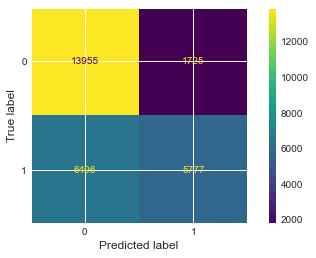

In [72]:
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
plot_confusion_matrix(logreg, X_train, y_train)

In [73]:
sm = SMOTE(random_state=2021)

In [74]:
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [75]:
X_train_sc=scaler.transform(X_train)

In [76]:
X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train)

## Logreg2

In [77]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear')

In [78]:
logreg2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [79]:
logreg2 = modeling_function(logreg2, X_train, y_train, X_val, y_val)

Training accuracy:  0.7301184130504775
Validation accuracy:  0.7349006890960681


In [80]:
logreg2_coefs = pd.DataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train.columns)
logreg2_coefs

,coefficient
construction_year,0.021013
longitude,0.480785
latitude,0.107732
region_Arusha,0.650114
region_Dar es Salaam,1.154299
region_Iringa,0.000000
region_Kigoma,4.496314
region_Kilimanjaro,0.660379
region_Lindi,0.261944
region_Manyara,0.992886


In [81]:
sorted2_coefs = logreg2_coefs.sort_values(by='coefficient', ascending=False)
sorted2_coefs

,coefficient
quantity_dry,4.911148
region_Kigoma,4.496314
region_Rukwa,3.529083
region_Mwanza,3.144776
region_Shinyanga,2.992194
region_Mara,2.671034
source_lake,2.373819
extraction_type_class_other,2.240093
quantity_unknown,1.962214
source_hand dtw,1.690251


## 

## Random Forest

In [82]:
forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X_train, y_train)


y_forest_pred = forest.predict(X_test)

print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.70


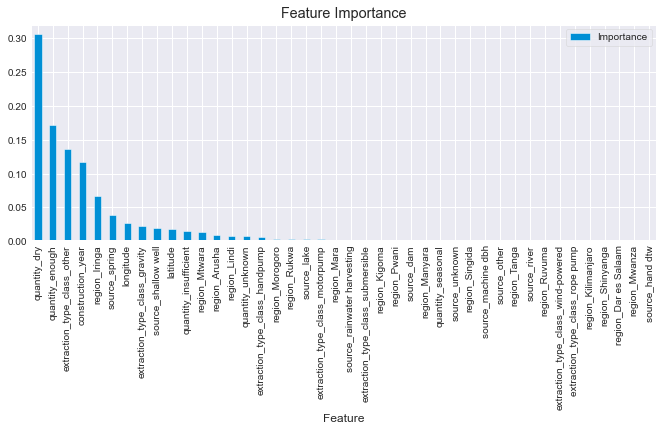

In [83]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

## Grid Search on Ramdom forrest

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [85]:
rf_gs = GridSearchCV(estimator=forest, param_grid=param_grid1, scoring='accuracy')

In [86]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=101),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [87]:
forest_model = rf_gs.best_estimator_

In [88]:
modeling_function(forest_model, X_train, y_train, X_val, y_val)

Training accuracy:  0.7936536328837692
Validation accuracy:  0.7813133360356709


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=101)

## Decision Tree 

In [89]:
dt = DecisionTreeClassifier(random_state = 2022)

In [90]:
dt = modeling_function(dt, X_train, y_train, X_val, y_val)

Training accuracy:  1.0
Validation accuracy:  0.7805026347790839


## Decision Tree Grid Search 

In [117]:
param_grid2 = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

dtree_gscv = GridSearchCV(dt, param_grid2, cv=3)
    
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [118]:
dtree_gscv.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=2022)

In [119]:
modeling_function(dtree_gscv, X_train, y_train, X_val, y_val)

Training accuracy:  0.832146817872858
Validation accuracy:  0.7800972841507904


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

## Decision Tree Recall 

In [120]:
final_model = dtree_gscv

In [121]:
y_pred = final_model.predict(X_test)

In [122]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Recall Score:')
print(recall_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.7851481736733288
----------------------------------------
Recall Score:
0.7048665620094191
----------------------------------------
Confusion Matrix:
[[2761  495]
 [ 752 1796]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3256
           1       0.78      0.70      0.74      2548

    accuracy                           0.79      5804
   macro avg       0.78      0.78      0.78      5804
weighted avg       0.79      0.79      0.78      5804



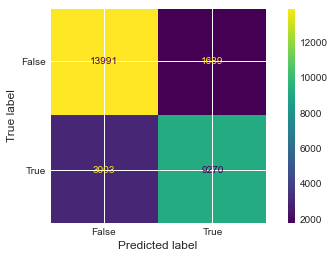

In [127]:
plot_confusion_matrix(dtree_gscv, X_train, y_train, display_labels=['False', 'True']);

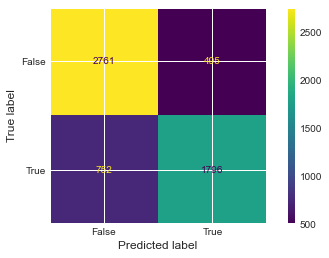

In [128]:
plot_confusion_matrix(dtree_gscv, X_test, y_test, display_labels=['False', 'True']);

## XG Boost

In [124]:
y_test

26620    0
46858    1
727      0
36976    1
44304    1
        ..
54804    0
73       1
34989    0
49764    0
49015    1
Name: status_group_non functional, Length: 5804, dtype: uint8

In [104]:
X_test

,construction_year,longitude,latitude,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
26620,1999,37.245871,-3.347868,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
46858,1975,39.120004,-9.919661,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
727,2004,37.340287,-3.320053,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
36976,1991,37.332683,-6.957116,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
44304,2005,37.967614,-4.453088,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54804,2012,35.456495,-4.335148,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
73,1991,34.657034,-1.888020,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
34989,2003,36.884841,-3.318725,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
49764,2007,37.772478,-5.965323,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [108]:
model_df.loc[[26620]]

,construction_year,longitude,latitude,status_group_functional,status_group_non functional,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
26620,1999,37.245871,-3.347868,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
